In [3]:
import numpy as np
import math
import matplotlib.pyplot as plt
''' Опишем функции '''

' Опишем функции '

In [49]:
def analyze_fft(f, title="", D=0):
    # test(f, "original " + title)
    x = discretization(10, 10/100)
    plot(x, f(x), "original " + title)
    g = fft(f(x))
    e = fft(g, inverse=True)
    x = np.ndarray.tolist(x)
    e = np.ndarray.tolist(e)
    plot(x, e, "fourier-transformed " + title, D)



def fft(a, inverse=False):
    if not inverse:
        a = np.asarray(a, dtype=float)
        n = a.shape[0]
        n_arr = np.arange(n)
        if n % 2 > 0 and n != 1:
            raise ValueError("size of x must be a power of 2")
        if n <= 32:
            k = n_arr.reshape((n, 1))
            M = np.exp(-2j * np.pi * k * n_arr * (-1 if inverse else 1) / n)
            return np.dot(M, a)
        else:
            A_even = fft(a[::2])
            A_odd = fft(a[1::2])
            factor = np.exp(-2j * np.pi * n_arr * (-1 if inverse else 1) / n)
            return np.concatenate([(A_even + factor[:n // 2] * A_odd) / (2 if inverse else 1),
                                   A_even + factor[n // 2:] * A_odd / (2 if inverse else 1)])
    else:
        return np.fft.ifft(a)


def discretization(To, Step):
    A = np.arange(0, To, Step)
    c = int(math.pow(2, (math.ceil(math.log2(len(A)))))) - len(A)
    A = np.append(A, [0] * c)
    return A


def plot(x, y, title="", coefficients_deleted=0):
    plt.title(title)
    for i in range(int(math.floor(len(y) - len(y) * coefficients_deleted)), len(y)):
        y[i] = 0
    plt.scatter(x, y, s=7)
    plt.grid(True)
    plt.show()
    
'''Посмотрим, что получается с частотой дискретизации 100 на [0, 10]'''



'Посмотрим, что получается с частотой дискретизации 100 на [0, 10]'

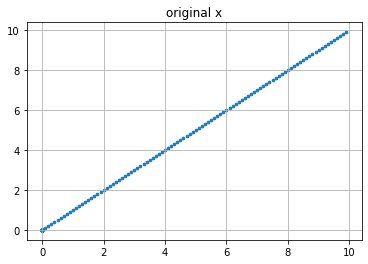

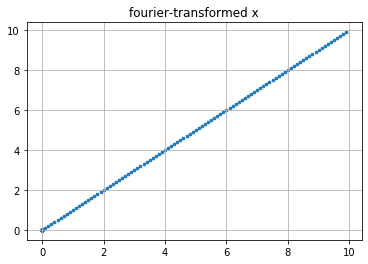

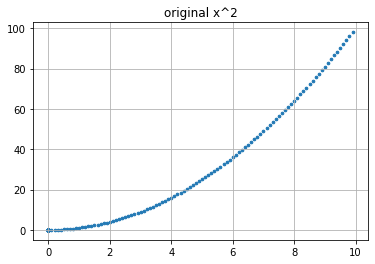

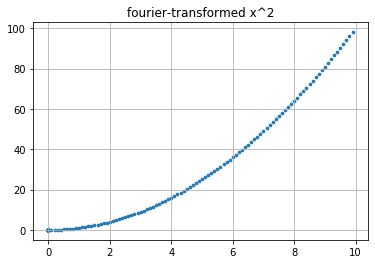

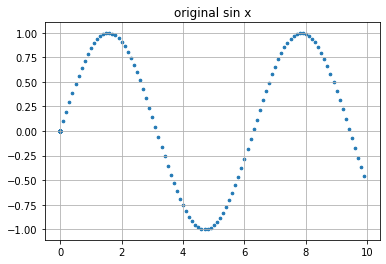

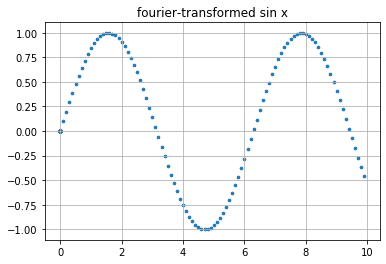

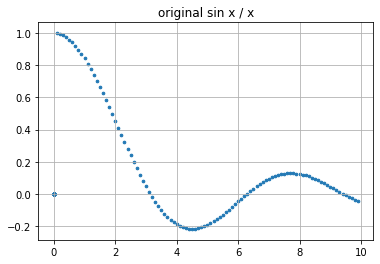

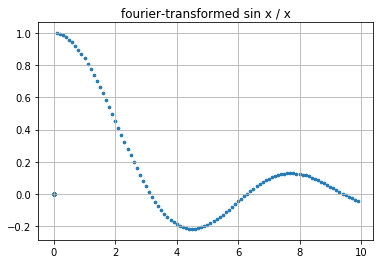

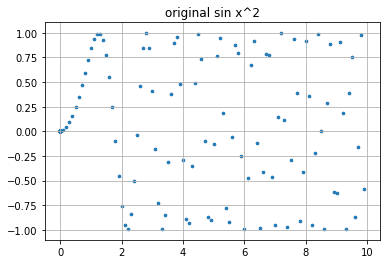

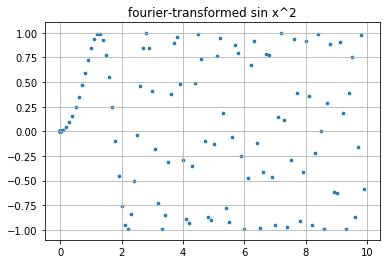

In [50]:
analyze_fft(lambda x : x, "x")
analyze_fft(lambda x : x*x, "x^2" )
analyze_fft(lambda x : np.sin(x), "sin x")
analyze_fft(lambda x : np.sin(x) / (x + 1e-12), "sin x / x")
analyze_fft(lambda x : np.sin(x*x), "sin x^2")

In [51]:
'''Классно, графики получились очень похожими. Теперь будем искать для каждой функции долю коэффициентов, при обнулении которых разница будет заметной'''

'Классно, графики получились очень похожими. Теперь будем искать для каждой функции долю коэффициентов, при обнулении которых разница будет заметной'

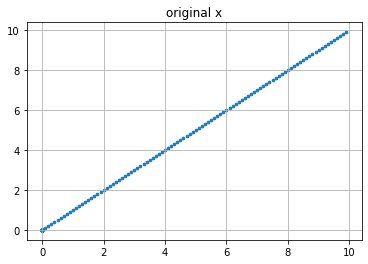

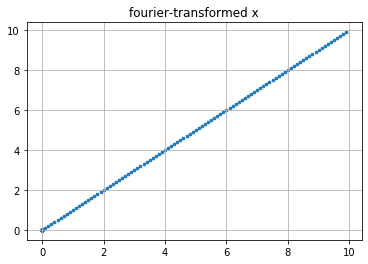

In [52]:
analyze_fft(lambda x : x, "x", D=0.05)

In [53]:
'''Наклон почти не изменился'''

'Наклон почти не изменился'

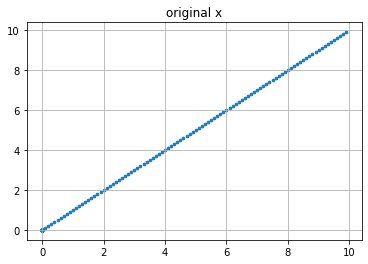

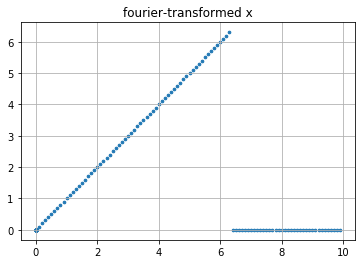

In [54]:
analyze_fft(lambda x : x, "x", D=0.5)

In [55]:
'''Видим, что данная функция не отличается на незануленном диапазоне дальше при большом D. Идем дальше'''

'Видим, что данная функция не отличается на незануленном диапазоне дальше при большом D. Идем дальше'

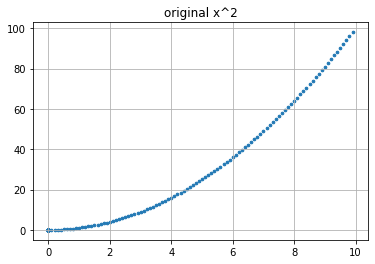

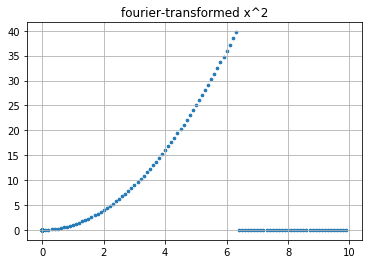

In [56]:
analyze_fft(lambda x : x*x, "x^2", 0.5 )

In [57]:
'''Здесь различия более заметны. Будем рассматривать меньшие значения D'''

'Здесь различия более заметны. Будем рассматривать меньшие значения D'

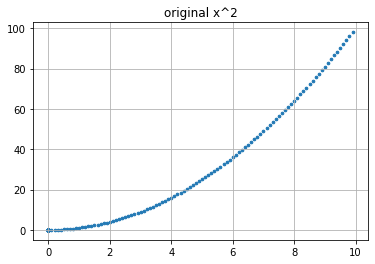

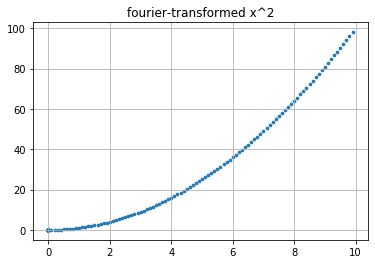

In [58]:
analyze_fft(lambda x : x*x, "x^2", 0.05 )

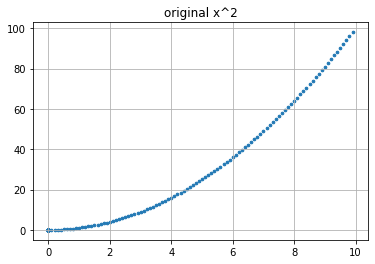

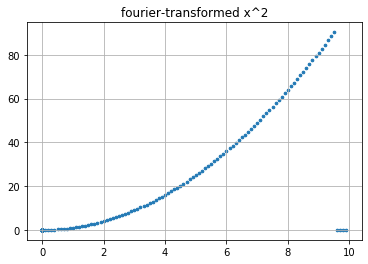

In [59]:
analyze_fft(lambda x : x*x, "x^2", 0.25 )

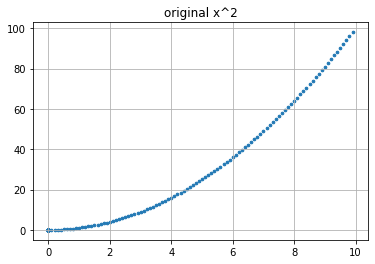

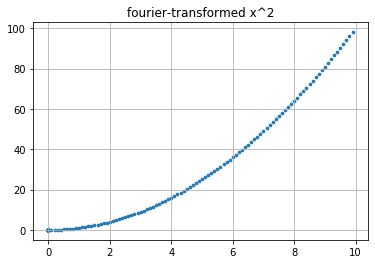

In [60]:
analyze_fft(lambda x : x*x, "x^2", 0.15 )

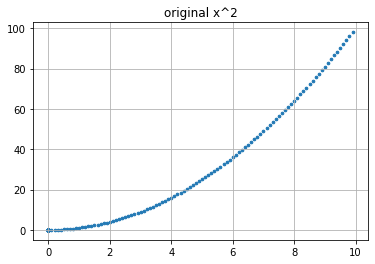

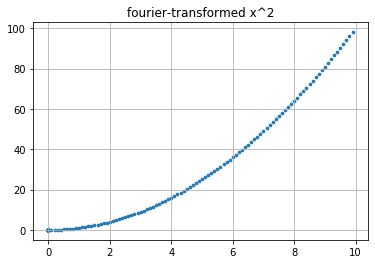

In [61]:
analyze_fft(lambda x : x*x, "x^2", 0.2 )

In [62]:
'''Остановимся на 0.25. Идем дальше'''

'Остановимся на 0.25. Идем дальше'

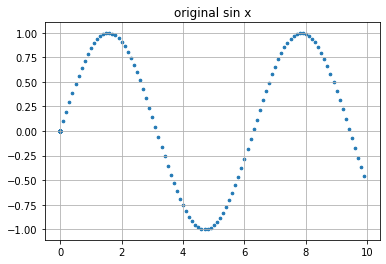

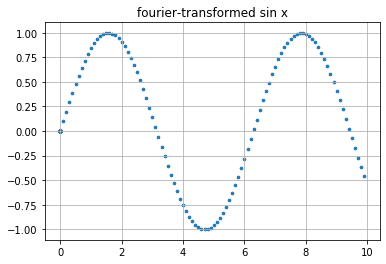

In [63]:
analyze_fft(lambda x : np.sin(x), "sin x", 0.05)

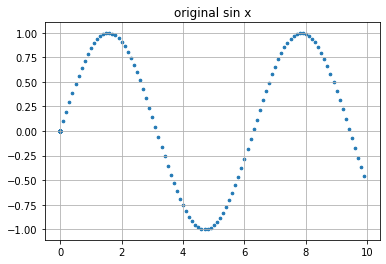

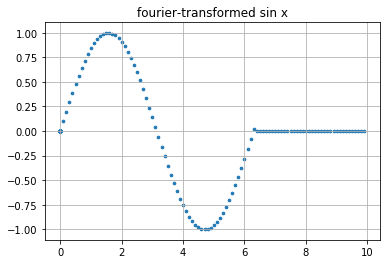

In [64]:
analyze_fft(lambda x : np.sin(x), "sin x", 0.5)

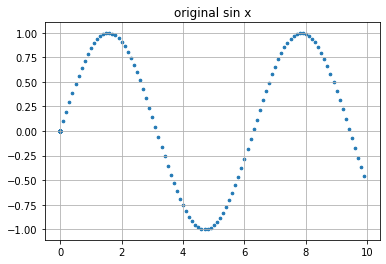

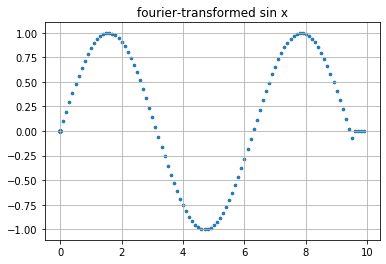

In [65]:
analyze_fft(lambda x : np.sin(x), "sin x", 0.25)

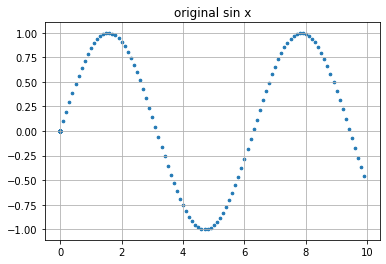

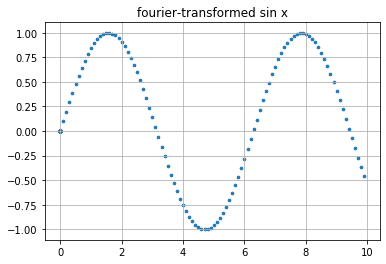

In [66]:
analyze_fft(lambda x : np.sin(x), "sin x", 0.2)

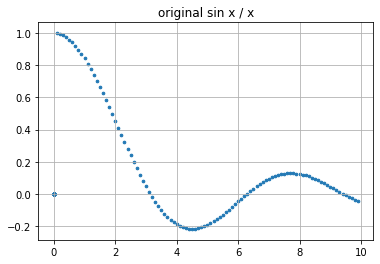

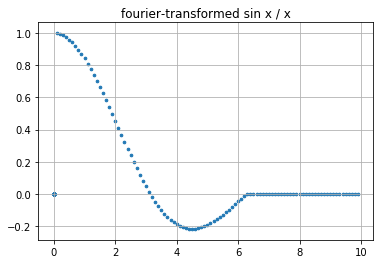

In [67]:
analyze_fft(lambda x : np.sin(x) / (x + 1e-12), "sin x / x", 0.5)

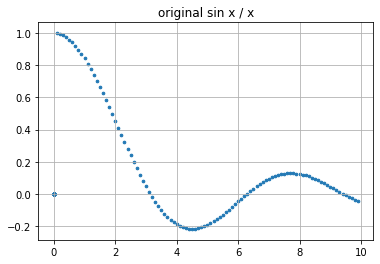

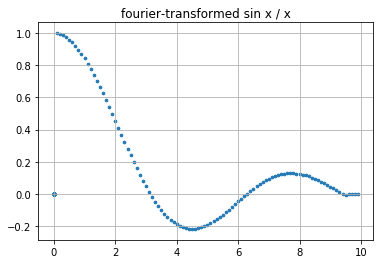

In [68]:
analyze_fft(lambda x : np.sin(x) / (x + 1e-12), "sin x / x", 0.25)

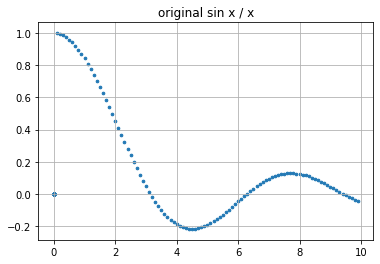

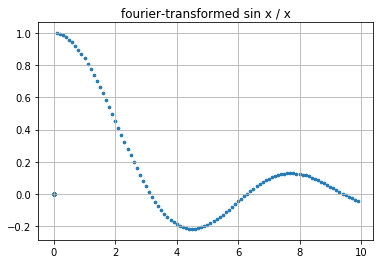

In [69]:
analyze_fft(lambda x : np.sin(x) / (x + 1e-12), "sin x / x", 0.2)

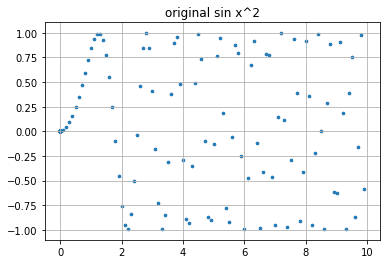

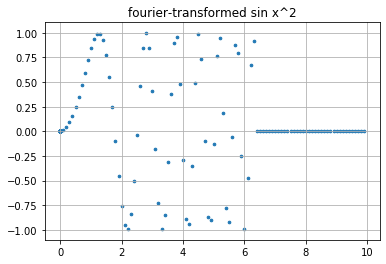

In [70]:
analyze_fft(lambda x : np.sin(x*x), "sin x^2", 0.5)

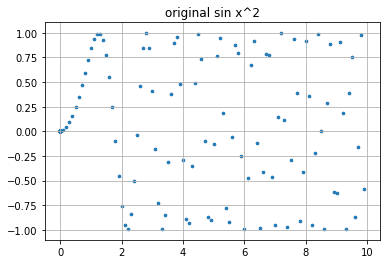

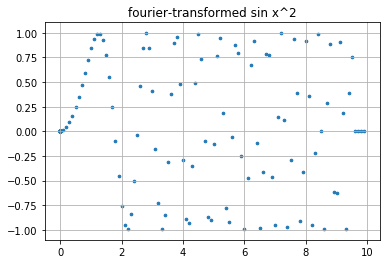

In [71]:
analyze_fft(lambda x : np.sin(x*x), "sin x^2", 0.25)

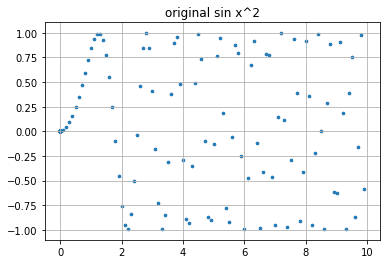

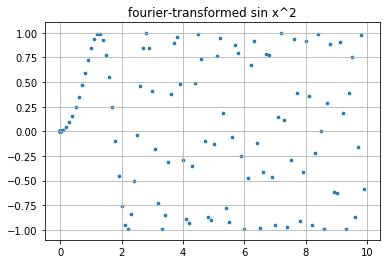

In [72]:
analyze_fft(lambda x : np.sin(x*x), "sin x^2", 0.2)

In [32]:
'''Для данных функций '''

'Можем сделать вывод, что синусоидальные графики даже с большой потерей конечных точек неплохо восстанавливаются dft.'